In [168]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

In [169]:
# data=pd.read_csv("./gumbelvsl1-rho.csv")
gumbel_data=pd.read_csv("./gumbelvsl1-rho-raws.csv")
print(gumbel_data.columns)
# print(data)
# data = data.drop(data[data['rho tolerance'] < 1].index)
iht_data=pd.read_csv("./iht-raws.csv")
print(iht_data.columns)

Index(['runid', 'date', 'model', 'hidden_dim', 'algorithm', 'dataset',
       'epochs', 'time elapsed', 'record_train_acc', 'record_test_acc',
       'last_train_acc', 'last_test_acc', 'target density/prune',
       'final l1 norm', 'learning rate', 'optimizer', 'momentum',
       'percent zeros', 'irmv1_gradnorm penalty', 'irmv1_penalty_anneal_iter',
       'pgd_anneal_iter', 'orig 28x28', 'ts', 'te', 'fraction z', 'pgd skip',
       'rho tolerance'],
      dtype='object')
Index(['runid', 'date', 'model', 'hidden_dim', 'algorithm', 'dataset',
       'epochs', 'time elapsed', 'record_train_acc', 'record_test_acc',
       'last_train_acc', 'last_test_acc', 'target density/prune',
       'final l1 norm', 'learning rate', 'optimizer', 'momentum',
       'percent zeros', 'irmv1_gradnorm penalty', 'irmv1_penalty_anneal_iter',
       'pgd_anneal_iter', 'orig 28x28', 'ts', 'te', 'fraction z', 'pgd skip',
       'rho tolerance'],
      dtype='object')


In [177]:
gumbel_data["percents"] = (gumbel_data["target density/prune"] * 100).apply(lambda x: round(x, 2))

iht_data["percents"] = ((1-iht_data["percent zeros"])*100).apply(lambda x: round(x, 2))
# iht_data["percents"] = (100-iht_data["rho tolerance"] / 512 * 100).apply(lambda x: round(x, 2))
iht_data.drop(iht_data[iht_data["percents"] == 100].index, inplace=True)


newdata = pd.DataFrame ({
    "percents": iht_data["percents"],
    "IHT": iht_data["last_test_acc"],
    "ProbMask": gumbel_data["last_test_acc"]
})
melt = pd.melt(newdata, id_vars=["percents"], value_vars=["IHT", "ProbMask"])

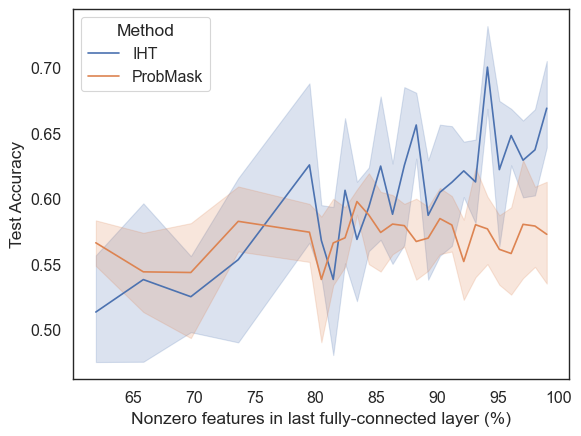

In [178]:
g = sns.lineplot(x="percents", y="value", hue="variable", data=melt)
sns.set_style("white")
g.set(xlabel="Nonzero features in last fully-connected layer (%)", ylabel="Test Accuracy")
g.set(ylabel="Test Accuracy")
# g.set_title("Sparsity on IRM: accuracy vs. sparsity constraint")
g.legend(title="Method")
sns.set_context("paper", font_scale=1.3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


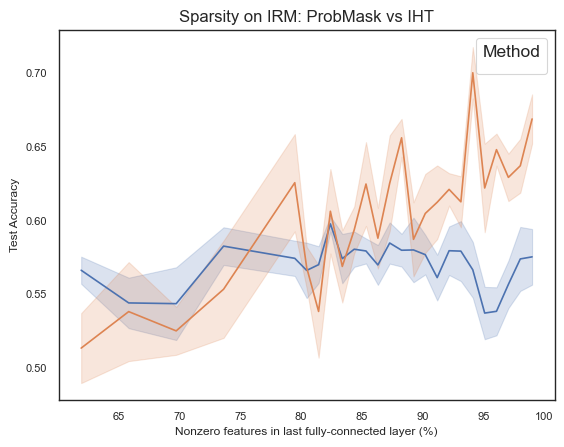

In [176]:
# Plot the responses for different events and regions
# sns.lineplot(x="density", y="iht_mean", data=data, errorbar="sd")
# sns.lineplot(x="density", y="probmask", data=data, errorbar="sd")
g = sns.lineplot(
    x="percents",
    y="last_test_acc",
    errorbar=("se", 1),
    err_style="band",
    data=gumbel_data,
    markers=True,
    dashes=False,
    legend=True
)
sns.lineplot(
    x="percents",
    y="last_test_acc",
    errorbar=("se", 1),
    err_style="band",
    data=iht_data,
    markers=True,
    dashes=False,
    legend=True
)
# g  = sns.lineplot(x='percents', y='iht_mean', yerr=data["iht_std"], data=data, color='red')
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set(font='times New Roman')
sns.set_style("white")
g.set(xlabel="Nonzero features in last fully-connected layer (%)", ylabel="Test Accuracy")
g.set(ylabel="Test Accuracy")
g.set_title("Sparsity on IRM: ProbMask vs IHT")
sns.set_context("paper", font_scale=1.3)

# g.legend(title="Method")

# g  = sns.scatterplot(x='percents', y='last_test_acc', data=gumbel_data)
# sns.scatterplot(x='percents', y='last_test_acc',  data=iht_data)